<a href="https://colab.research.google.com/github/smvjk/League-of-Legends-Worlds-2021-Play-In-Analysis/blob/main/League_of_Legends_Worlds_2021_Play_In_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

League of Legends Worlds 2021 Play-In Analysis

I tried to explore diverse data processing methods, by examining the competitive matches of theLeague of Legends Worlds 2021 Play-In stage. From October 5th to October 9th, 10 teams clashed in fierce best-of-one matches. Among them, LNG Esports, DetonatioN FM, Hanwha Life, and Cloud9 emerged victorious, securing their spots in the main event.

Dataset: https://www.kaggle.com/datasets/braydenrogowski/league-of-legends-worlds-2021-playin-group-stats/

Lolpedia: https://lol.fandom.com/wiki/2021_Season_World_Championship/Play-In

In [ ]:
from google.colab import files
uploaded = files.upload()

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

lol = pd.read_csv("League of Legends 2021 World Championship Play-In Groups Statistics - Raw Data.csv")

Saving League of Legends 2021 World Championship Play-In Groups Statistics - Raw Data.csv to League of Legends 2021 World Championship Play-In Groups Statistics - Raw Data.csv


Description of Dataset

In [ ]:
#Data Extraction
print('Shape of dataset: ',lol.shape)
print(lol.head())
print(lol.describe())
#print(lol.info())
df = pd.DataFrame(lol)
print(df.dtypes)

Shape of dataset:  (220, 20)
  Team    Player Opponent Position Champion  Kills  Deaths  Assists  \
0  UOL      Boss       GS      Top  Camille      4       5        3   
1   GS     Crazy      UOL      Top     Gwen      3       1        9   
2  UOL  Ahahacik       GS   Jungle  Trundle      2       4        5   
3   GS    Mojito      UOL   Jungle    Talon      5       4       10   
4  UOL    Nomanz       GS      Mid  Leblanc      1       3        4   

   Creep Score  Gold Earned  Champion Damage Share  Kill Participation  \
0          188        11107                   0.17                0.78   
1          217        12201                   0.20                0.52   
2          156         9048                   0.15                0.78   
3          194        11234                   0.23                0.65   
4          216         9245                   0.29                0.56   

   Wards Placed  Wards Destroyed  Ward Interactions  Dragons For  \
0             8                

Overall statistics of the Play-In stage

In [ ]:
# Overall statistics
total_matches = len(lol)/10
total_teams = len(lol['Team'].unique())
total_players = len(lol['Player'].unique())
print(f"Total Matches: {total_matches}")
print(f"Total Teams: {total_teams}")
print(f"Total Players: {total_players}")

Total Matches: 22.0
Total Teams: 10
Total Players: 55


Heatmap correlation

<ipython-input-4-7a46da47daaf>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(lol.corr(), annot = True, cmap = 'Blues')


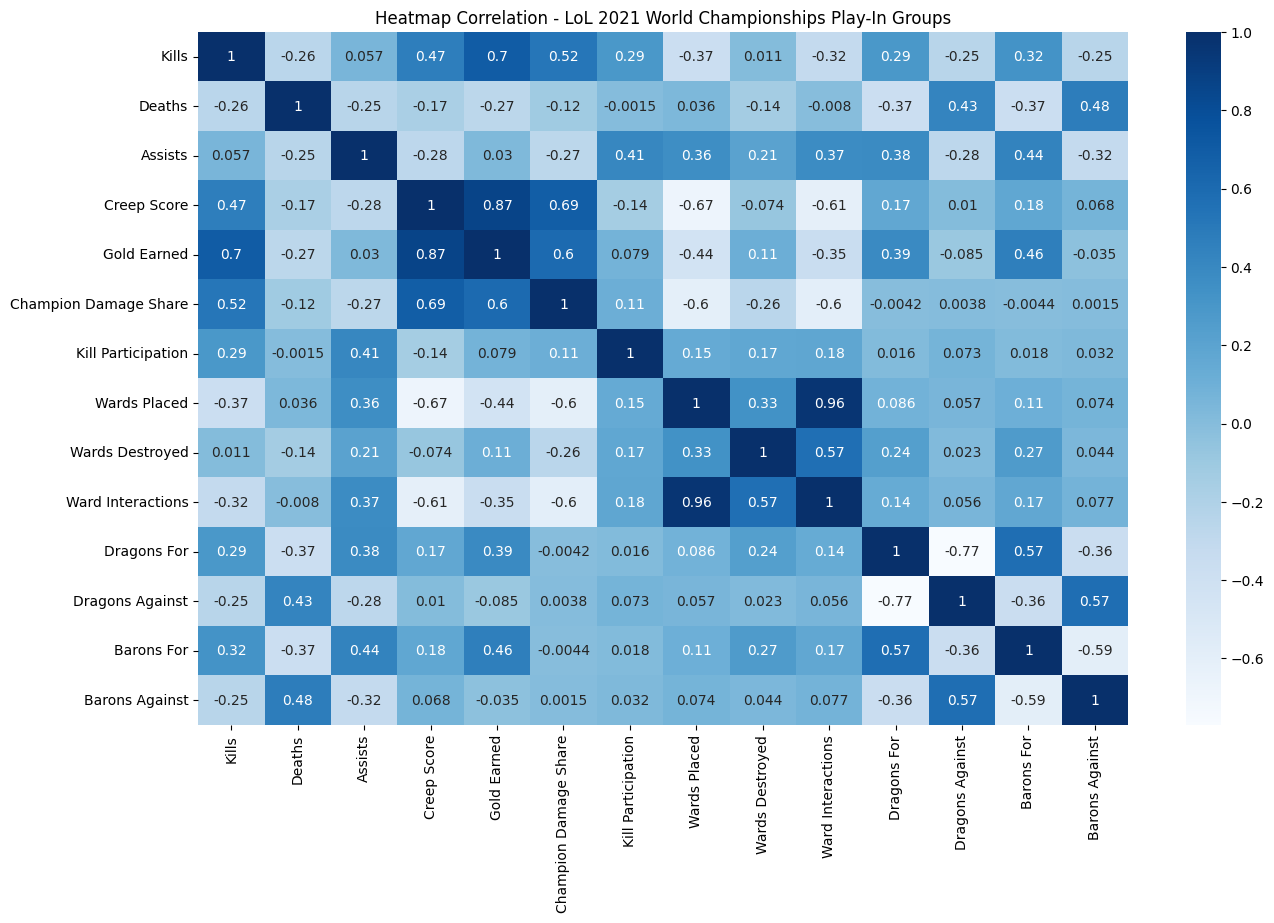

In [ ]:
# Heatmap correlation
plt.figure(figsize = (15,9))
sns.heatmap(lol.corr(), annot = True, cmap = 'Blues')
plt.title("Heatmap Correlation - LoL 2021 World Championships Play-In Groups")
plt.show()

Top players with the best KDA (Kills Deaths Assists ratio) by role KDA is a great indicator of a player's performance and impact in games. It reflects how effectively a player participates in kills (eliminating opponents), avoids being eliminated (deaths), and assists teammates in eliminating opponents. Here I focused mainly on KDA depending of role to check the impact that each role have on game.

In [ ]:
# Top players with best KDA by role
top_kda_players = lol.groupby(['Position', 'Player', 'Team'])['Kills', 'Deaths', 'Assists'].mean()
top_kda_players['KDA'] = (top_kda_players['Kills'] + top_kda_players['Assists']) / top_kda_players['Deaths']
top_kda_players = top_kda_players.reset_index()
top_kda_players = top_kda_players.loc[top_kda_players.groupby('Position')['KDA'].idxmax()]
print('Top players with the best KDA by role')
print(top_kda_players)

Top players with the best KDA by role
   Position  Player Team  Kills  Deaths  Assists        KDA
4       Adc   Light  LNG   4.00    0.50      5.0  18.000000
18   Jungle   Steal  DFM   4.20    1.40      6.4   7.571429
21      Mid    Aria  DFM   2.60    0.80      4.6   9.000000
35  Support  Iwandy  LNG   0.75    0.50      9.0  19.500000
44      Top     Ale  LNG   6.50    0.75      4.0  14.000000


<ipython-input-5-f61a2b837d1d>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  top_kda_players = lol.groupby(['Position', 'Player', 'Team'])['Kills', 'Deaths', 'Assists'].mean()


Player who has achieved the best Kill/Death/Assist ratio (KDA) across all the matches played

Here KDA is equal infinity, because he had 0 deaths during that game

In [ ]:
lol['KDA'] = (lol['Kills'] + lol['Assists']) / lol['Deaths']
highest_kda_index = lol['KDA'].idxmax()
highest_kda_player = lol.loc[highest_kda_index, 'Player']
highest_kda_team = lol.loc[highest_kda_index, 'Team']
highest_kda_ratio = lol.loc[highest_kda_index, 'KDA']
opponent_team = lol.loc[highest_kda_index, 'Opponent']
champion_played = lol.loc[highest_kda_index, 'Champion']
kills = lol.loc[highest_kda_index, 'Kills']
deaths = lol.loc[highest_kda_index, 'Deaths']
assists = lol.loc[highest_kda_index, 'Assists']

print(f"Highest KDA player in overall games: {highest_kda_player}, team: {highest_kda_team}")
print(f"Versus {opponent_team}, Champion Played: {champion_played}")
print(f"KDA ratio: {highest_kda_ratio}")
print(f"Kills: {kills}, Deaths: {deaths}, Assists: {assists}")

Highest KDA player in overall games: Bolulu, team: GS
Versus UOL, Champion Played: Twisted Fate
KDA ratio: inf
Kills: 5, Deaths: 0, Assists: 13


Player with most kills in a single game

In [ ]:
# Player with most kills in a single game
max_kills_index = lol['Kills'].idxmax()
player_most_kills = lol.loc[max_kills_index, 'Player']
team_most_kills = lol.loc[max_kills_index, 'Team']
print(f'Player with most kills in single game: {player_most_kills}, team: {team_most_kills}')

Player with most kills in single game: Buggax, team: INF


Player with most different champions played

In [ ]:
# Player with most different champions played
player_most_champions = lol.groupby('Player')['Champion'].nunique().idxmax()
player_team = lol.loc[lol['Player'] == player_most_champions, 'Team'].unique()[0]
print(f"Player with most different champions played: {player_most_champions}, team: {player_team}")
champions_played = lol.loc[lol['Player'] == player_most_champions, 'Champion'].unique()
print(f"Champions played by {player_most_champions}: {', '.join(champions_played)}")

Player with most different champions played: Blaber, team: C9
Champions played by Blaber: Qiyana, Taliyah, Lee Sin, Xin Zhao, Olaf


KDA ratio depending on the result (Winning/Losing)

In [ ]:
# KDA ratio depending on the result
kda_by_result = lol.groupby('Result')['Kills', 'Deaths', 'Assists'].mean()
kda_by_result['KDA'] = (kda_by_result['Kills'] + kda_by_result['Assists']) / kda_by_result['Deaths']
print('KDA ratio depending on the Winning/Losing')
print(kda_by_result)

KDA ratio depending on the Winning/Losing
           Kills    Deaths   Assists       KDA
Result                                        
L       1.609091  3.818182  3.454545  1.326190
W       3.809091  1.618182  7.881818  7.224719


<ipython-input-9-212c4a8fc3f2>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  kda_by_result = lol.groupby('Result')['Kills', 'Deaths', 'Assists'].mean()


Results of the teams during Play-In Stage

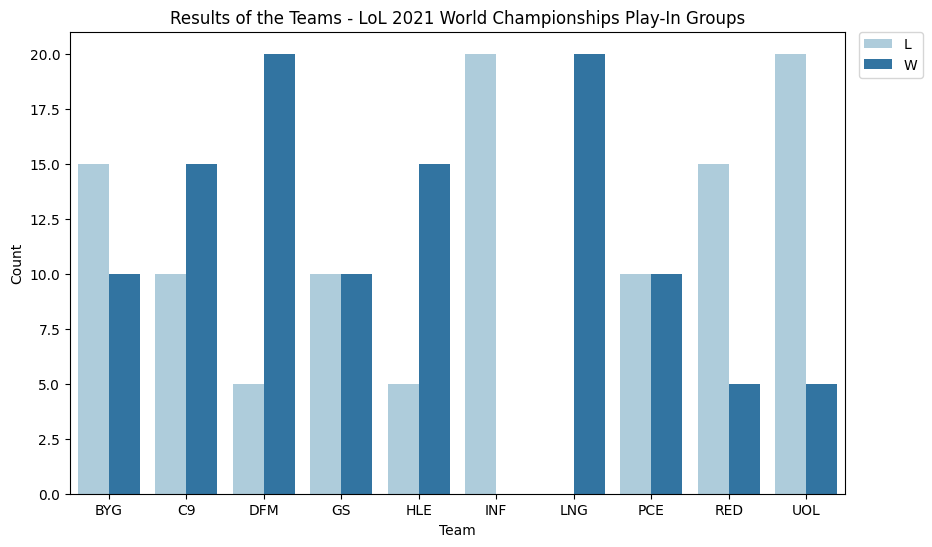

In [ ]:
#Group team & result
team_result = lol.groupby(['Team', 'Result']).size().reset_index(name = 'Count')
plt.figure(figsize = (10,6))
sns.barplot(x = 'Team', y = 'Count', hue = 'Result', data = team_result, palette = 'Paired')
plt.title("Results of the Teams - LoL 2021 World Championships Play-In Groups")
plt.legend(bbox_to_anchor = (1.1,1), borderaxespad = 0)
plt.show()

Best players from each team based on Champion Damage Change

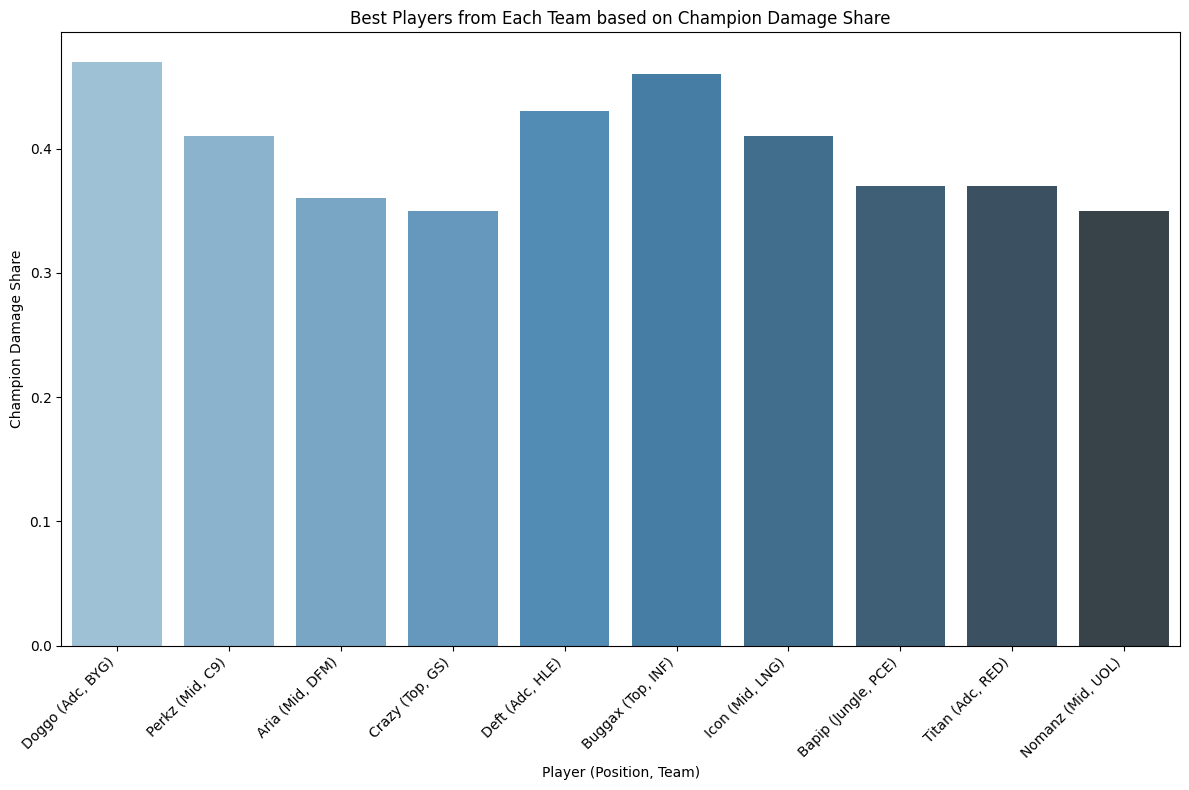

In [ ]:
# Find players with the highest Champion Damage Share for each team
best_damage_share_players = lol.groupby(['Team', 'Player', 'Position'])['Champion Damage Share'].max().reset_index()
best_damage_share_players = best_damage_share_players.loc[best_damage_share_players.groupby('Team')['Champion Damage Share'].idxmax()]
best_damage_share_players['Player'] = best_damage_share_players.apply(lambda row: f"{row['Player']} ({row['Position']}, {row['Team']})", axis=1)
plt.figure(figsize=(12, 8))
sns.barplot(x='Player', y='Champion Damage Share', data=best_damage_share_players, palette='Blues_d')
plt.title('Best Players from Each Team based on Champion Damage Share')
plt.xlabel('Player (Position, Team)')
plt.ylabel('Champion Damage Share')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Wards placed by support depending on result

Wards placed by supports are crucial in League of Legends for several reasons. Mostly, vision control is vital as it provides valuable information about the enemy team's movements and objectives like Dragon or Baron

In [ ]:
# Wards placed by support depending on result
wards_by_support = lol[lol['Position'] == 'Support'].groupby('Result')['Wards Placed'].mean()
print('Mean of placing wards depending of result of the game')
print(wards_by_support)

Mean of placing wards depending of result of the game
Result
L    44.5
W    49.0
Name: Wards Placed, dtype: float64


Role with most gold earned Gold in League of Legends directly translates to power, enabling players to purchase essential items, strengthen their champions, and gain a strategic advantage that contributes to winning game. Gold can be earned for example by killing objectives, enemies, minions

In [ ]:
# Role with most gold earned
role_most_gold = lol.groupby('Position')['Gold Earned'].mean().idxmax()
print(f'Role with most gold earned: {role_most_gold}')

Role with most gold earned: Adc


Scatter plot of minion score vs. gold earned by role

Here we can check which role kills the most minions

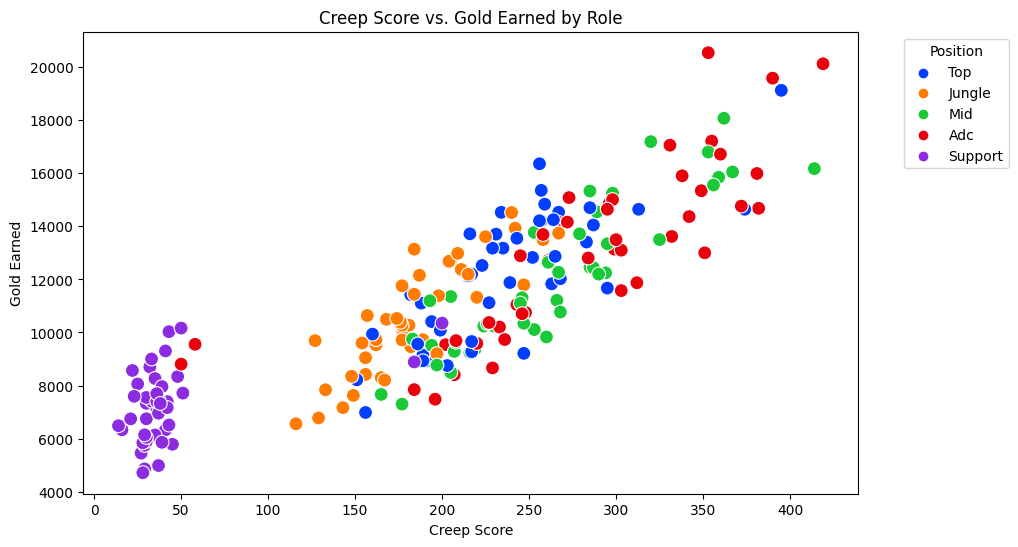

In [ ]:
# Scatter plot of creep score vs. gold earned by role
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Creep Score', y='Gold Earned', hue='Position', data=lol, palette='bright', s=100)
plt.title('Creep Score vs. Gold Earned by Role')
plt.xlabel('Creep Score')
plt.ylabel('Gold Earned')
plt.legend(title='Position', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

Role with biggest kill participation and kills

In [ ]:
# Role with biggest kill participation and kills
role_most_kill_participation = lol.groupby('Position')['Kill Participation'].mean().idxmax()
role_most_kill = lol.groupby('Position')['Kills'].mean().idxmax()
print(f'Role with most kills: {role_most_kill}')
print(f'Role with most kill participation: {role_most_kill_participation}')

Role with most kills: Adc
Role with most kill participation: Support


Average kills, deaths, and assists by position

Most kill participation by position

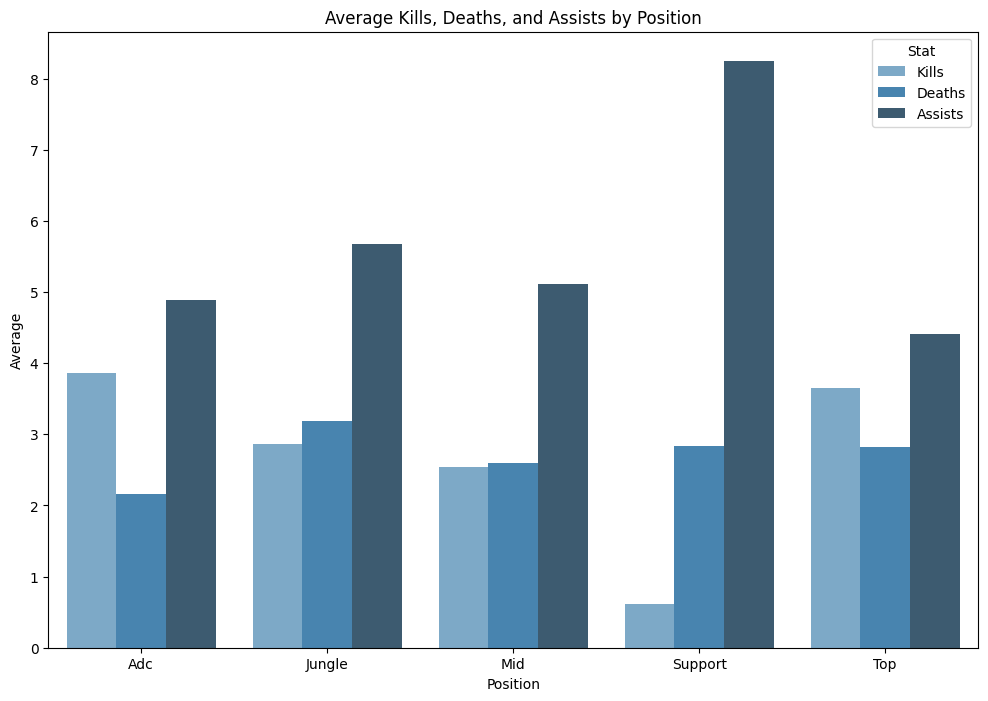

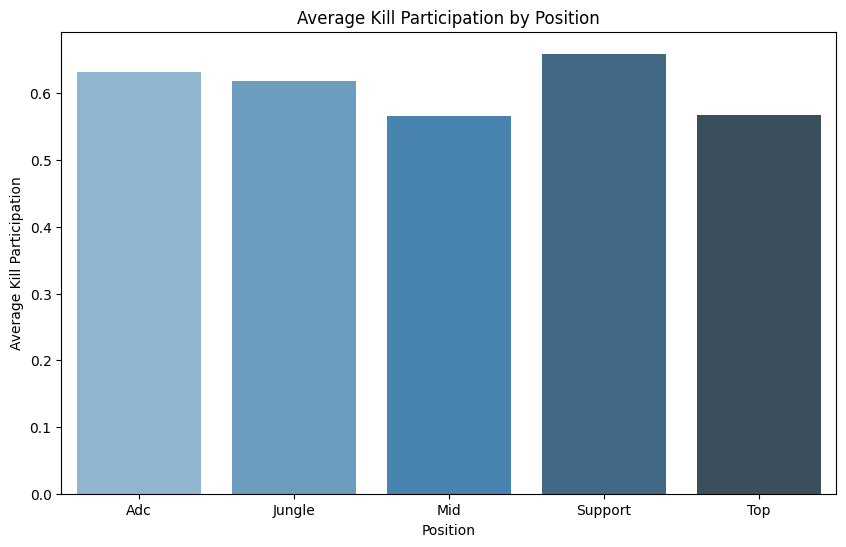

In [ ]:
# Average kills, deaths, and assists by position
role_stats = lol.groupby('Position')[['Kills', 'Deaths', 'Assists','Kill Participation']].mean().reset_index()
role_stats_melted = pd.melt(role_stats, id_vars='Position', value_vars=['Kills', 'Deaths', 'Assists'],
                            var_name='Stat', value_name='Average')
plt.figure(figsize=(12, 8))
sns.barplot(x='Position', y='Average', hue='Stat', data=role_stats_melted, palette='Blues_d')
plt.title('Average Kills, Deaths, and Assists by Position')
plt.xlabel('Position')
plt.ylabel('Average')
plt.legend(title='Stat')
plt.show()
# most kill participation
plt.figure(figsize=(10, 6))
sns.barplot(x='Position', y='Kill Participation', data=role_stats, palette='Blues_d')
plt.title('Average Kill Participation by Position')
plt.xlabel('Position')
plt.ylabel('Average Kill Participation')
plt.show()

Most picked champion by role

In [ ]:
# Most picked champion by role
most_picked_champions = lol.groupby(['Position', 'Champion']).size().reset_index(name='Count')
most_picked_champions = most_picked_champions.loc[most_picked_champions.groupby('Position')['Count'].idxmax()]
print('Most picked champion by the role')
print(most_picked_champions)

Most picked champion by the role
   Position      Champion  Count
7       Adc  Miss Fortune     18
23   Jungle      Xin Zhao     12
35      Mid         Sylas      9
47  Support         Leona     13
66      Top         Jayce      9


Champion with most deaths

In [ ]:
# Champion with most deaths
champion_most_deaths = lol.groupby('Champion')['Deaths'].sum().idxmax()
print(f'Champion with most deaths: {champion_most_deaths}')

Champion with most deaths: Xin Zhao


Dragon vs. Baron depending on result

Here we can check what objective statistically is more worth to kill with a team depending on the outcome of the game

In [ ]:
# Dragon vs. Baron depending on result
dragon_vs_baron = lol[lol['Result'] == 'W'][['Dragons For', 'Barons For']].mean()
print('Dragons vs. Baron depending on the result: ')
print(dragon_vs_baron)

Dragons vs. Baron depending on the result: 
Dragons For    2.954545
Barons For     1.000000
dtype: float64


Group data by Result, Team, and Dragon/Baron count

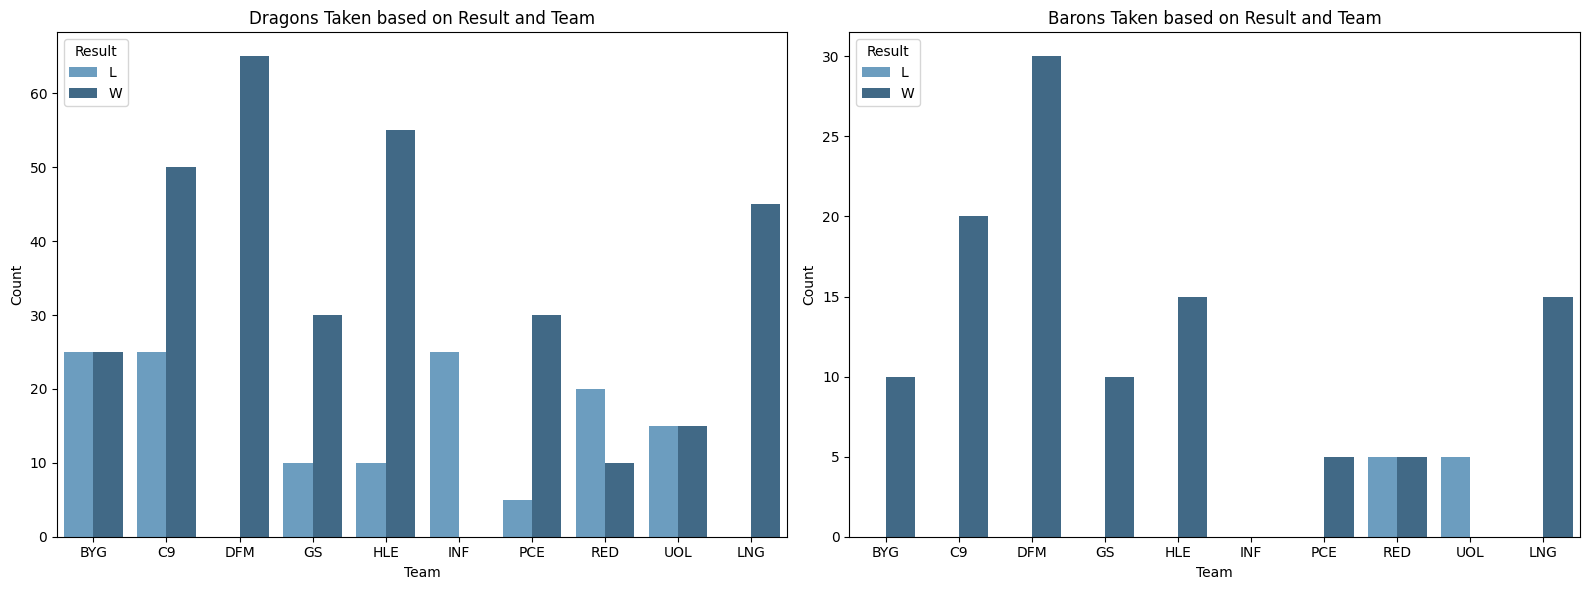

In [ ]:
# Group data by Result, Team, and Dragon/Baron count
dragon_baron_counts = lol.groupby(['Result', 'Team'])[['Dragons For', 'Barons For']].sum().reset_index()
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))
# Plot dragons taken based on result and team
sns.barplot(x='Team', y='Dragons For', hue='Result', data=dragon_baron_counts, palette='Blues_d', ax=axes[0])
axes[0].set_title('Dragons Taken based on Result and Team')
axes[0].set_xlabel('Team')
axes[0].set_ylabel('Count')
axes[0].legend(title='Result')
sns.barplot(x='Team', y='Barons For', hue='Result', data=dragon_baron_counts, palette='Blues_d', ax=axes[1])
axes[1].set_title('Barons Taken based on Result and Team')
axes[1].set_xlabel('Team')
axes[1].set_ylabel('Count')
axes[1].legend(title='Result')
plt.tight_layout()
plt.show()

In my analysis of the League of Legends Worlds 2021 Play-In group stage, I identified the best performing players, focusing on key parameters like KDA ratios and champion picks. Teams showcased strategies, with successful ones emphasizing strong teamwork, objective control, and efficient vision placement by supports. These conclusions showed me new insights about the game and also established known facts.